<a href="https://colab.research.google.com/github/DionesGouvea/BeeData_USP/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dicionario

- **survival**	Survival	0 = No, 1 = Yes
- **Pclass**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **sex**	Sex	
- **Age**	Age in years	
- **sibsp**	# Nº de irmãos / cônjuges a bordo do Titanic	
- **parch**	# Nº de pais / filhos a bordo do Titanic	
- **ticket**	Ticket number	
- **fare**	Passenger fare	
- **cabin**	Cabin number	
- **embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Imports 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Analise exploratoria 

In [ ]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

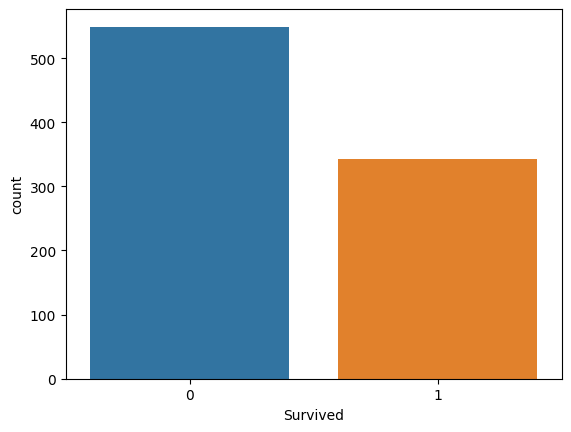

In [ ]:
sns.countplot(x='Survived', data=train_data)


Text(0.5, 1.0, 'Distribuição de Sobreviventes por sexo')

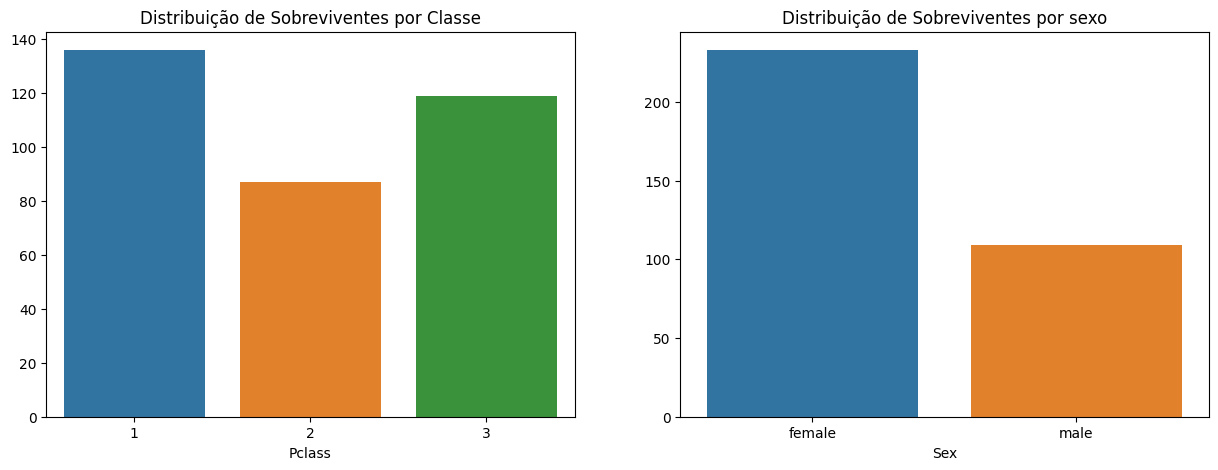

In [ ]:
# Conta o número de sobreviventes por sexo
survivors_by_sex = train_data.groupby('Sex')['Survived'].sum()
#Contando o numero de sobreviventes por classe 
survivors_by_class = train_data.groupby('Pclass')['Survived'].sum()

#plot
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x=survivors_by_class.index, y=survivors_by_class.values)
plt.title('Distribuição de Sobreviventes por Classe')
plt.subplot(1,2,2)
sns.barplot(x=survivors_by_sex.index, y=survivors_by_sex.values)
plt.title('Distribuição de Sobreviventes por sexo')

- Temos mais sobreviventes da primeira classe se comparado com as demais 
- Mulheres são o dobro de sobreviventes homens. 

<Axes: title={'center': 'Realçao de ter sobrevivdo e a quantidade de Filhos/pais'}, xlabel='Survived', ylabel='Parch'>

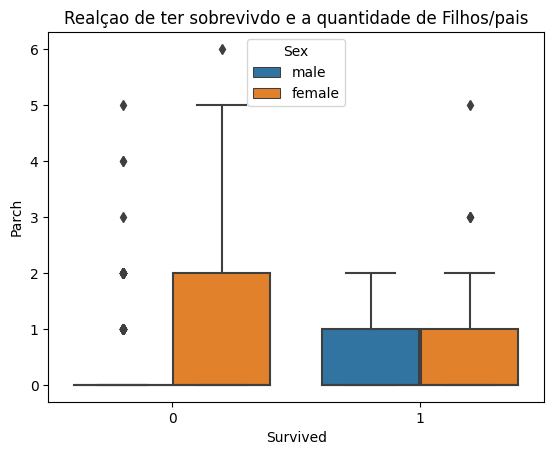

In [ ]:
plt.title('Realçao de ter sobrevivdo e a quantidade de Filhos/pais')
sns.boxplot(x= 'Survived', y ='Parch', hue= 'Sex',data= train_data )

- importante notar que a mediana de todos boxplot estão em 0 ou seja pelo menos metade dos passageiros provavelmente não tinha filhos/pais a bordo. 
- passageiros homens que não sobreviveram em sua grande maioria não tinha filhos/pais a bordo

<Axes: title={'center': 'Realçao de ter sobrevivdo e a quantidade irmãos/Conjulgue'}, xlabel='Survived', ylabel='count'>

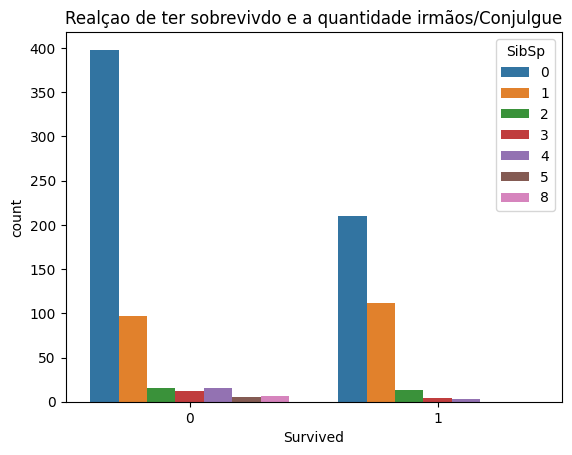

In [ ]:
plt.title('Realçao de ter sobrevivdo e a quantidade irmãos/Conjulgue')
sns.countplot(x= 'Survived', hue= 'SibSp',data= train_data )

não aparenta ter alguma diferença significante entre as pessoas que não sobreviveram e sobreviveram pelo numero de irmãos/conjulgue

Text(0, 0.5, 'Tarifa de Passagem')

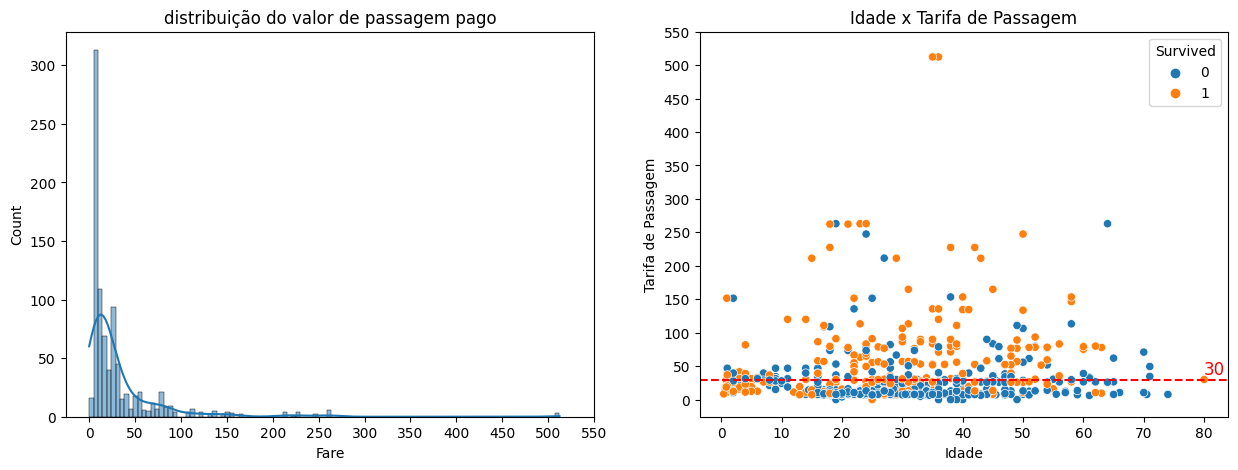

In [ ]:
plt.figure(figsize = (15,5))
#distribuição do valor de passagem pago 
plt.subplot(1,2,1)
plt.title('distribuição do valor de passagem pago')
sns.histplot(train_data.Fare,kde = True)
plt.xticks(range(0, 600, 50))

# idade x Tarifa de passagem por sobrevivente 
plt.subplot(1,2,2)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.yticks(range(0, 600, 50))
plt.axhline(y=30, color='r', linestyle='--')
plt.text(80, 45, '30', color='r', fontsize=12, va='center')
plt.title('Idade x Tarifa de Passagem')
plt.xlabel('Idade')
plt.ylabel('Tarifa de Passagem')

- é possivel notar que a grande maioria dos passageiros pagaram 30 ou menos na tarifa de passagem
- A grande maioria dos passageiros que pagaram 30 ou mais na tarifa sobreviveram

Text(2.3, 45, '30')

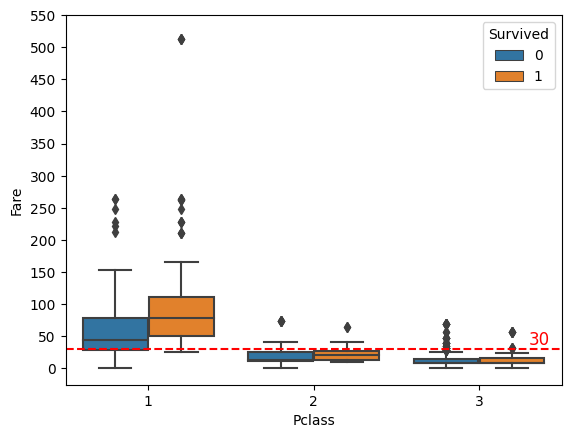

In [ ]:
sns.boxplot(x='Pclass', y='Fare',hue='Survived', data=train_data)
plt.yticks(range(0, 600, 50))
plt.axhline(y=30, color='r', linestyle='--')
plt.text(2.3, 45, '30', color='r', fontsize=12, va='center')

- é possivel perceber que em todas as classes as pessoas que sobreviveram pagaram mais caro na passagem
- Essa diferença e mais notavel na primeira classe onde a maioria das pessoas sobreviveram, as que não sobreviveram pagaram menos na tarifa 

Text(0, 0.5, 'Contagem')

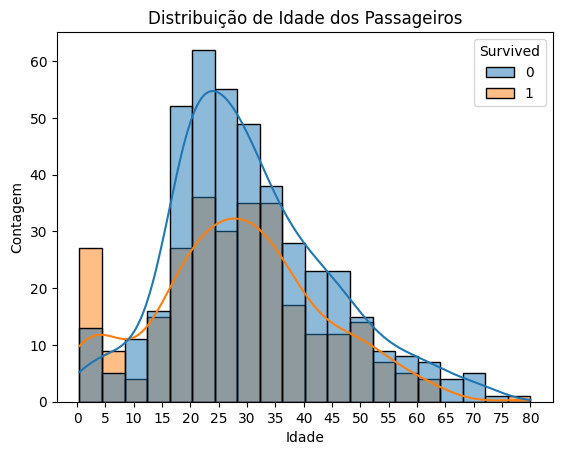

In [ ]:
# 
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.xticks(range(0, 85, 5))
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')

- É possivel perceber que temos um pico ali para crianças sobreviventes menores que 5 anos, muito provavelmente crianças de colo que foram permitidas embarcar com prioridade nos botes. 

- 


Text(0.5, 1.0, 'Relação entre enbarked e sobrevivencia')

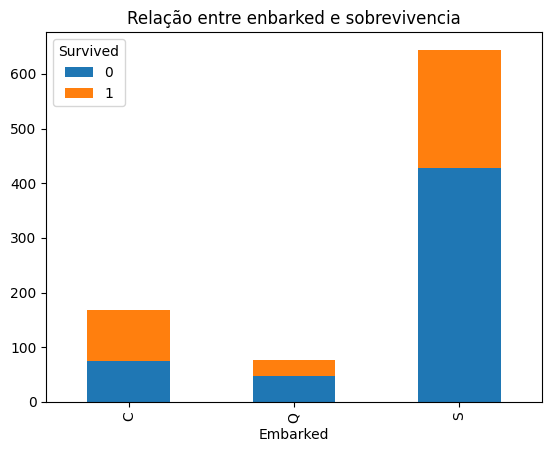

In [ ]:
embarked_survived = pd.crosstab(train_data['Embarked'], train_data['Survived']) #tabela de contingencia 
embarked_survived.plot(kind='bar', stacked=True)
plt.title('Relação entre enbarked e sobrevivencia')

- nao consigo identificar nenhuma relaçao importante aqui, e possivel ver que pessoas que embarcaram em S foram as que menos sobreviveram porem, e onde foi feito a maior parte do embarque então aparentemente faz sentido este numero alto de não sobreviventes. 

##Pre-processamento

#### Verificando outliers

In [ ]:
train_data.describe(percentiles=[.25, .5, .75, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
fare_99 = train_data['Fare'].quantile(0.99)
outliers = train_data[train_data['Fare'] > fare_99]
outliers['Name']


27            Fortune, Mr. Charles Alexander
88                Fortune, Miss. Mabel Helen
258                         Ward, Miss. Anna
311               Ryerson, Miss. Emily Borie
341           Fortune, Miss. Alice Elizabeth
438                        Fortune, Mr. Mark
679       Cardeza, Mr. Thomas Drake Martinez
737                   Lesurer, Mr. Gustave J
742    Ryerson, Miss. Susan Parker "Suzette"
Name: Name, dtype: object

resolvi verificar o nome dos passageiros que pagaram valores acima do percentil 99,5% para ver se pertencem a mesma familia. 
- A familia Fortune e Ryerson estão pouca coisa acima do percentil 99% porem os demais então com o dobro do valor do percentil 99% então vou trunkar todos em 99%, caso eu opte por algum algoritmo que não sofra com outrliers eu desfaço isto. 

In [ ]:
# Calculando o percentil 99 de Fare
fare_99 = np.percentile(train_data['Fare'], 99)

# Truncar os valores acima do percentil 99 em Fare
train_data['Fare'] = np.where(train_data['Fare'] > fare_99, fare_99, train_data['Fare'])

Text(0, 0.5, 'Tarifa de Passagem')

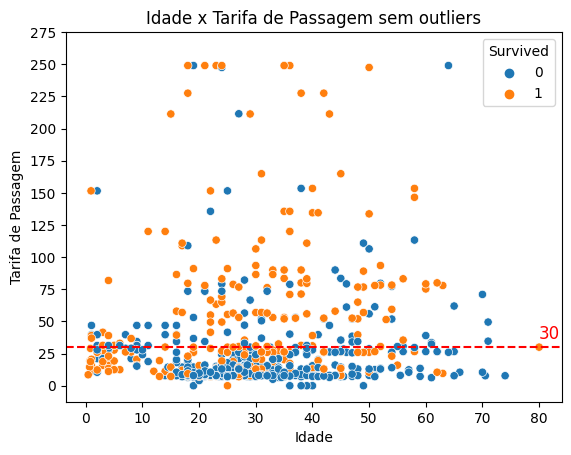

In [ ]:
# Verificando como ficou o plot apos a remoção dos outliers 

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.yticks(range(0, 300, 25))
plt.axhline(y=30, color='r', linestyle='--')
plt.text(80, 40, '30', color='r', fontsize=12, va='center')
plt.title('Idade x Tarifa de Passagem sem outliers')
plt.xlabel('Idade')
plt.ylabel('Tarifa de Passagem')

ainda possuo dados outliers porem esses dados são menos descrepantes dos que os que estavam acima de 99%

#### Verificando dados nulos 

In [ ]:
#pd.set_option('display.max_rows', 10)
train_data.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

- A feature **cabin** tem muitos dados faltantes e não consigo ver uma forma de imputar esses valores de forma que faça sentido. 
- a feature **embarked** não me pareceu ter relação com o fato do passageiro sobreviver ou não então também irei remover 
- a feature **idade** tem 20% de dados faltantes existem algumas opções de imputação que passaram pela minha mente e gostaria de testar, apos rodar meu modelo eu retorno aqui e faço testes diferentes mas a principio vou imputar pela Classe do bilhete e a idade. 



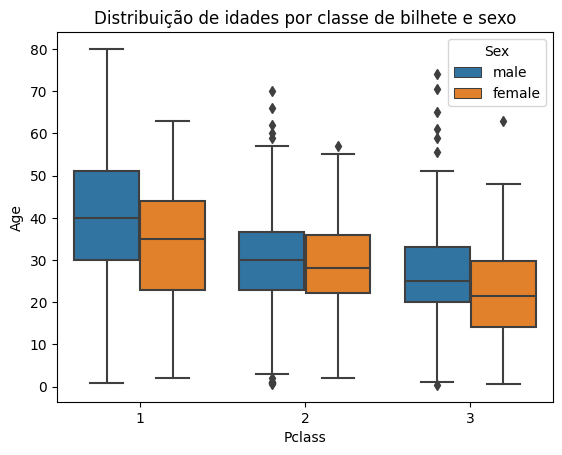

In [ ]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train_data)
plt.title('Distribuição de idades por classe de bilhete e sexo')
plt.show()

Existe uma diferença de idade notavel por classe de bilhete vamos olhar a mediana 

In [ ]:
# calculando a mediana da idade por classe de bilhete
median_age_by_class = train_data.groupby('Pclass')['Age'].median()

# exibindo as medianas por classe de bilhete
print(median_age_by_class)

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [ ]:
# preenchendo os valores faltantes da idade com base na mediana da classe de bilhete
train_data['Age'] = train_data.apply(
    lambda row: median_age_by_class[row['Pclass']] if pd.isna(row['Age']) else row['Age'], 
    axis=1
)

anotando aqui por que ainda não tenho o costume de usar lambda e não quero esquecer do que ta acontecendo aqui 😅 

- estou dando um aply da feature **Age** onde caso a linha seja vazia ira preencher ela com a mediana da **Pclass** que o passageiro pertence, caso não seja vazia ela so retorna o valor ja existente.

In [ ]:
copy_train_data = train_data.copy()

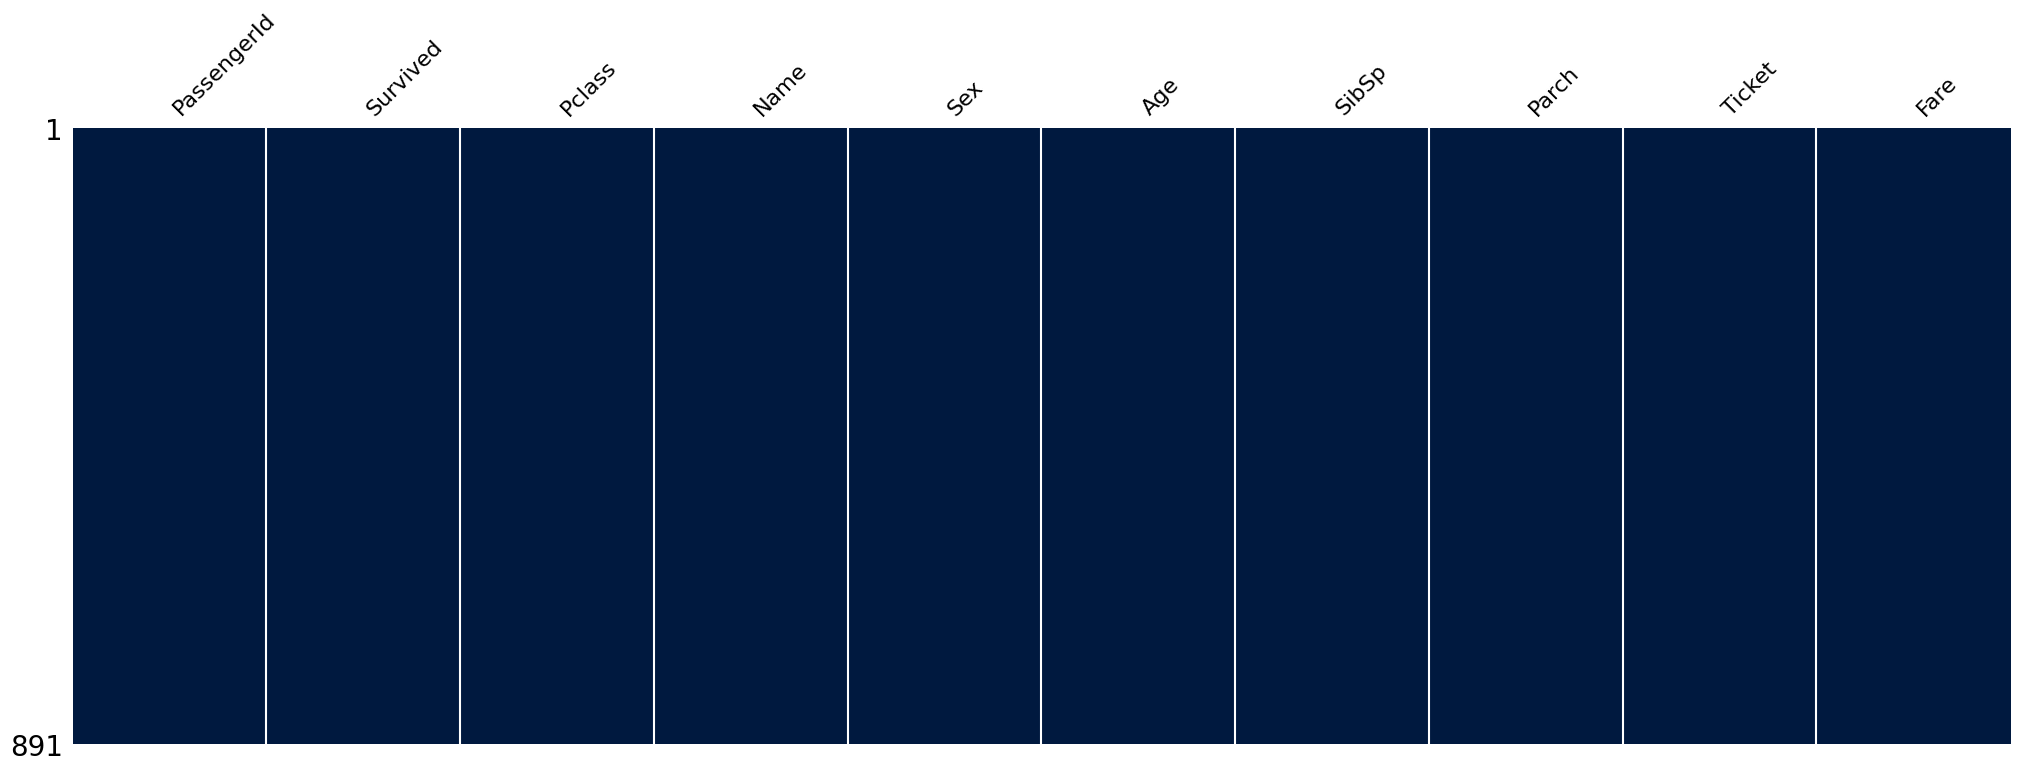

In [ ]:
train_data.drop(['Cabin','Embarked'],axis =1, inplace = True)
msno.matrix(train_data, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);

#### outras variaveis 


In [ ]:
train_data.drop(['PassengerId','Name','Ticket'],axis =1, inplace = True)

- passengerID e apenas um index então sera removido 
- Ticket, infelizmente a numeração dos tickets não segue uma ordem e ainda existia tickets compartilhados por familia ou mais de um passageiro, tornando dificil tirar qualquer informação util disto então sera removido também. 
- Name, eu acredito que de para trabalhar com feature engeneering em cima da variavel name porem exigem um trabalho que não tenho certeza se trara um resultado relevante, então por hora irei remover. 

#### preparando os dados para modelagem

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Colocando a variavel age e Fare em uma escala menor 
train_data[['Age', 'Fare']] = sc.fit_transform(train_data[['Age', 'Fare']])

In [ ]:
data_train = pd.get_dummies(train_data, columns=['Sex'], drop_first=True)

In [ ]:
X = data_train.drop('Survived', axis = 1)
y = data_train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3,random_state = 1603)

In [ ]:
X_train.shape, X_test.shape

((623, 6), (268, 6))

## Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Modelo de ML
rfc = RandomForestClassifier(random_state=1603)

In [ ]:
rfc.fit(X_train, y_train)
y_pred_train_rfc_baseline = rfc.predict(X_test)
print(classification_report(y_test, y_pred_train_rfc_baseline))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       164
           1       0.72      0.78      0.75       104

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



uma precisão de 72% para o ponto de partida, agora é tentar melhorar isto 🙏

##Buscando melhores parametros com GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# define os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# realiza o grid search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# exibe os melhores parâmetros encontrados
print(grid_search.best_params_)

In [ ]:
rfc = RandomForestClassifier(max_depth = None, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 100, random_state=1603)
rfc.fit(X_train, y_train)
y_pred_train_rfc_baseline = rfc.predict(X_test)
print(classification_report(y_test, y_pred_train_rfc_baseline))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       164
           1       0.79      0.78      0.78       104

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



apenas com GridSearch foi possivel obter uma melhoria de 7% na precisão agora com 79%

## Feature Engenering 
- como quero comparar as melhorias que estão sendo obtidas por cada tomada de decisão estou inserindo somente agora na pipeline o Feature engenering, pretendo dividir novamente os conjunto de dados com as novas features criadas. 

In [ ]:
# Criando a feature familiaTipo 
copy_train_data['Familia'] = copy_train_data['SibSp'] + copy_train_data['Parch'] + 1 

def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

copy_train_data['FamiliaTipo'] = copy_train_data['Familia'].apply(aux) 

criando uma feature que vai criar grupos de familia: sozinho - pequena - grande 

In [ ]:
#pegando apenas os titulos presentes nos nomes que representam Status sociais para epoca 

def aux(x):
    return x.split(', ')[1].split('. ')[0] #pegando tudo depois da ', ' até o '. '

copy_train_data['Titulo'] = copy_train_data['Name'].apply(aux)

Vou pegar os titulos dos nomes das pessoas que indicavam Status social e militar na epoca.

In [ ]:
copy_train_data.Titulo.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Titulo, dtype: int64

In [ ]:
#fazendo agrupamento dos grupos com poucos passageiros
def aux(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Outros'

copy_train_data['Titulo'] = copy_train_data['Titulo'].apply(aux)

Mantive os 4 primeiros titulos e os demais que tinham poucos valores agrupei em 'Outros' 

In [ ]:
"""
#criando a feature deck que vai informar o deck do passageiro obtdo pela feature cabin
def get_deck(cabin):
    if isinstance(cabin, str): #isintance é usado para garantir que o primeiro caractere seja uma letra (STR)
        return cabin[0]
    else:
        return 'Desconhecido'
        
copy_train_data['Deck'] = copy_train_data['Cabin'].apply(get_deck)"""


"\n#criando a feature deck que vai informar o deck do passageiro obtdo pela feature cabin\ndef get_deck(cabin):\n    if isinstance(cabin, str): #isintance é usado para garantir que o primeiro caractere seja uma letra (STR)\n        return cabin[0]\n    else:\n        return 'Desconhecido'\n        \ncopy_train_data['Deck'] = copy_train_data['Cabin'].apply(get_deck)"

o deck e a primeira letra da cabine valores nulos seram representados por desconhecido

## Pre-processamento apos feature engineering 

In [ ]:
copy2_train_data = copy_train_data.copy()

In [ ]:
copy_train_data = copy_train_data.drop(['PassengerId','Name','Cabin','Familia','Ticket'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Colocando a variavel age e Fare em uma escala menor 
copy_train_data[['Age', 'Fare']] = sc.fit_transform(copy_train_data[['Age', 'Fare']])

In [ ]:
data_train2 = pd.get_dummies(copy_train_data, columns=['Sex','FamiliaTipo','Titulo','Embarked','Pclass'], drop_first=True)

In [ ]:
X = data_train2.drop('Survived', axis = 1)
y = data_train2['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3,random_state = 1603)

In [ ]:
X_train.shape, X_test.shape

((623, 15), (268, 15))

Antes do feature engenering existia 6 colunas, agora tem 15, bora para modelagem. 

## Modelo Baseline com Novas features

In [ ]:
rfc = RandomForestClassifier(random_state=1603)

In [ ]:
rfc.fit(X_train, y_train)
y_pred_train_rfc_baseline = rfc.predict(X_test)
print(classification_report(y_test, y_pred_train_rfc_baseline))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       164
           1       0.74      0.76      0.75       104

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



## Buscando melhores parametros com GridSearch apos Feature Engineering

In [ ]:
# define os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# realiza o grid search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# exibe os melhores parâmetros encontrados
print(grid_search.best_params_)

In [ ]:
rfc = RandomForestClassifier(max_depth = 10,min_samples_leaf =1, min_samples_split= 5, n_estimators = 200, random_state=1603)

rfc.fit(X_train, y_train)
y_pred_train_rfc_baseline = rfc.predict(X_test)
print(classification_report(y_test, y_pred_train_rfc_baseline))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       164
           1       0.80      0.79      0.79       104

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



Depois de alguma features consegui melhorar a precisão em apenas 1%, vamos validar com validação cruzada para obter um resultado mais confiavel. 

### validação cruzada 

In [ ]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
rfc = RandomForestClassifier(max_depth = 7,min_samples_leaf =1, min_samples_split= 5, n_estimators = 100, random_state=1603)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

# Realizando a validação cruzada
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
results = cross_validate(rfc, X, y, cv=cv, scoring=scoring)

# Imprimindo os resultados
print("Accuracy: {:.2f}".format(results['test_accuracy'].mean()))
print("Precision: {:.2f}".format(results['test_precision_macro'].mean()))
print("Recall: {:.2f}".format(results['test_recall_macro'].mean()))
print("F1-score: {:.2f}".format(results['test_f1_macro'].mean()))

Accuracy: 0.83
Precision: 0.83
Recall: 0.80
F1-score: 0.81


temos 83% de precisão apartir da validação cruzada. :)

## Aplicando as transformaçoes no conjunto de teste 

In [ ]:
test_data = pd.read_csv('/content/test.csv')

#### Outliers

In [ ]:
# Calculando o percentil 99 de Fare
fare_99 = np.percentile(test_data['Fare'], 99)

# Truncar os valores acima do percentil 99 em Fare
test_data['Fare'] = np.where(test_data['Fare'] > fare_99, fare_99, test_data['Fare'])

#### Dados nulos

In [ ]:
#pd.set_option('display.max_rows', 10)
test_data.isnull().mean().sort_values(ascending=False)

Cabin          0.782297
Age            0.205742
Fare           0.002392
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
dtype: float64

eu não esperava que tivesse alguns dados faltantes em Fare no conjunto de teste, pois não apareceu no conjunto de treinamento, eu vou imputar esses valores com base na median() do meu conjunto de fare do meu conjunto de treinamento   

In [ ]:
# Calculando a mediana de Fare nos dados de treinamento
fare_median = copy2_train_data['Fare'].median()

# Preenchendo os valores faltantes em Fare nos dados de teste com a mediana dos dados de treinamento
test_data['Fare'].fillna(fare_median, inplace=True)


In [ ]:
test_data.Fare.isnull().mean()

0.0

In [ ]:
# preenchendo os valores faltantes da idade com base na mediana da classe de bilhete dos dados de treinamento 
test_data['Age'] = test_data.apply(
    lambda row: median_age_by_class[row['Pclass']] if pd.isna(row['Age']) else row['Age'], 
    axis=1
)

In [ ]:
test_data.Age.isnull().mean()

0.0

Aqui eu usei **median_age_by_class** que ja estava pronto no meus dados de treinamento contendo a mediana da idade com base em **Pclass** que o passageiro pertence 





####Feature engineering conjunto de teste

In [ ]:
# Criando a feature familiaTipo 
test_data['Familia'] = test_data['SibSp'] + test_data['Parch'] + 1 

def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

test_data['FamiliaTipo'] = test_data['Familia'].apply(aux) 

In [ ]:
#pegando apenas os titulos presentes nos nomes que representam Status sociais para epoca 

def aux(x):
    return x.split(', ')[1].split('. ')[0] #pegando tudo depois da ', ' até o '. '

test_data['Titulo'] = test_data['Name'].apply(aux)

In [ ]:
#fazendo agrupamento dos grupos com poucos passageiros
def aux(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Outros'

test_data['Titulo'] = test_data['Titulo'].apply(aux)

#### Pre-processamento

In [ ]:
copy_test_data = test_data.copy()

In [ ]:
test_data = test_data.drop(['PassengerId','Name','Cabin','Familia','Ticket'], axis = 1)

In [ ]:
#Colocando a variavel age e Fare em uma escala menor 
test_data[['Age', 'Fare']] = sc.fit_transform(test_data[['Age', 'Fare']])

In [ ]:
test_data = pd.get_dummies(test_data, columns=['Sex','FamiliaTipo','Titulo','Embarked','Pclass'], drop_first=True)

## Fazendo o predict no conjunto de teste

In [ ]:
rfc.fit(X_train, y_train)
test_data_predicted = rfc.predict(test_data)

In [ ]:
# Criando o DataFrame com as colunas PassengerId e Survived
submission_df = pd.DataFrame({
    "PassengerId": copy_test_data["PassengerId"],
    "Survived": test_data_predicted
})

# Salvando o DataFrame em um arquivo csv
submission_df.to_csv("submission.csv", index=False)


In [ ]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
